In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 种类数据


In [2]:
file_category = r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\category.csv'
category = pd.read_csv(file_category,sep=',',encoding = 'latin-1',names=['id','name'])

In [3]:
category.index = category['id']
del category['id']

In [4]:
categories = category['name']
categories.head()

id
0                           Arts & Entertainment
4bf58dd8d48988d1e1931735                  Arcade
4bf58dd8d48988d1e2931735             Art Gallery
4bf58dd8d48988d1e4931735           Bowling Alley
4bf58dd8d48988d17c941735                  Casino
Name: name, dtype: object

# 地点数据

In [5]:
file_venuesLA = r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\venues_LA.csv'
file_veneusNYC = r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\venues_NYC.csv'
venues_LA = pd.read_csv(file_venuesLA,encoding = 'latin-1')
venues_NYC = pd.read_csv(file_veneusNYC,encoding = 'latin-1')

D:\software\Python\Anaconda_Install\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


** 地点拼接 **

In [44]:
venue = pd.concat([venues_LA,venues_NYC]).drop_duplicates(['vid']) #地点拼接
venue['city'].replace({'NY':'New York'}, inplace = True)
venue['state'].replace({'New York':'NY', 'California':'CA', 'New Jersey':'NJ'}, inplace = True)
venue.to_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\venues.csv')#拼接数据写入同一文件

In [39]:
len(venue['vid'].unique())

370235

In [40]:
print('LA数据的POI总数：-----%d-----' % len(venues_LA))
print('NYC数据的POI总数：----%d-----' % len(venues_NYC)) 
print('POI总数：----%d----' % len(venue))

LA数据的POI总数：-----206416-----
NYC数据的POI总数：----215614-----
POI总数：----370235----


In [12]:
venue = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\venues.csv',encoding = 'latin-1',sep = ',')

In [13]:
venue['city'] = venue['city'].replace('null',np.nan)
venue['state'] = venue['state'].replace('null',np.nan)

In [14]:
a = venue.city.value_counts()
a[a>1000]

Los Angeles            32455
New York               26446
Brooklyn                9278
San Francisco           4707
Long Beach              3898
Chicago                 3311
Burbank                 2835
Torrance                2789
Santa Monica            2684
San Diego               2572
Glendale                2365
San Fernando Valley     2315
Las Vegas               2105
Washington              1930
Bronx                   1922
Philadelphia            1800
Seattle                 1714
London                  1650
Austin                  1563
Beverly Hills           1505
Boston                  1431
Pasadena                1362
Atlanta                 1283
West Hollywood          1282
Toronto                 1267
North Hollywood         1207
Jersey City             1197
Portland                1166
Staten Island           1140
Houston                 1092
Culver City             1090
Redondo Beach           1082
Van Nuys                1065
Dallas                  1061
Sherman Oaks  

In [ ]:
#找到缺失值
vnull = venue[venue['city'].isnull()]

lat = list(venue['latitude'])
lon = list(venue['longtitude'])
city = venue['city']
for i in vnull.index:
    d = (lat - lat[1])**2 + (lon - lon[1])**2


In [159]:
d = (lat - lat[1])**2 + (lon - lon[1])**2
d.sort_values().index[1]

198859

# 用户数据

In [56]:
file_usersLA = r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\users_LA.csv'
file_usersNYC = r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\users_NYC.csv'
users_LA = pd.read_csv(file_usersLA, sep = ',', encoding = 'latin-1')
users_NYC = pd.read_csv(file_usersNYC, sep = ',', encoding = 'latin-1')

In [3]:
users_LA.head()

,uid,gender,home,city,state
0,528470,male,"['London', ' United Kingdom']",London,United Kingdom
1,525576,male,"['Arlington', ' TX']",Arlington,TX
2,15420,female,"['San Francisco', ' CA']",San Francisco,CA
3,387,male,"['New York', ' NY']",New York,NY
4,90398,female,"['London', ' UK']",London,UK


** 用户拼接 **

In [104]:
user = pd.concat([users_LA,users_NYC]).drop_duplicates(['uid'])
user['city'].replace('NY', 'New York',inplace = True)
user['state'].replace({' New York':' NY',' California':' CA','California':' CA','NY':' NY','NYC':' NY',' Ca':' CA',' ca':' CA','Los Angeles':'CA'},inplace = True)

NameError: name 'users_LA' is not defined

In [35]:
def f(x):
    if isinstance(x,str):
        return x.strip()
    else:
        return x
user['state'] = user['state'].map(f)
user.to_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\users.csv')

In [21]:
print('LA数据中user总数：---%d---' % len(users_LA.index.unique()))
print('NYC数据中user总数：---%d---' % len(users_NYC.index.unique()))
print('用户总数：----%d----' % len(user))

LA数据中user总数：---501940---
NYC数据中user总数：---717382---
用户总数：----980325----


** 完整的用户数据集**

In [6]:
file_user = r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\users.csv'
user = pd.read_csv(file_user,sep = ',',encoding = 'latin-1')

In [7]:
user['state'].replace({'New York':'NY','California':'CA',' California':'CA','NYC':'NY','Ca':'CA','ca':'CA','New Jersey':'NJ','Los Angeles':'CA'},inplace = True)
user['state'].replace({'New York City':'New York'},inplace = True)
user['city'].replace({'New York City':'New York','NYC':'New York','New york':'New York','new york':'New York'},inplace = True)

In [11]:
a = user['city'].value_counts()   #'Queens','THE BRONX','Staten Island
a[a>1000]

New York                                 102304
Los Angeles                               33188
San Francisco                             18515
Brooklyn                                  17945
Chicago                                   15258
Jakarta                                   13782
San Diego                                  9744
Philadelphia                               7909
Atlanta                                    7678
Washington                                 7660
Seattle                                    7385
Boston                                     7238
London                                     6925
Austin                                     6385
Las Vegas                                  5843
Singapore                                  5084
Toronto                                    5071
S?o Paulo                                  4762
Dallas                                     4745
Queens                                     4526
Houston                                 

In [80]:
user['state'].value_counts()

CA           162786
NY           162704
NJ            41820
Indonesia     38208
FL            27720
TX            26471
IL            21025
PA            20636
MA            17271
GA            13614
Name: state, dtype: int64

# 签到数据

In [101]:
file_tipsLA = r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\tips_LA.csv'
file_tipsNYC = r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\tips_NYC.csv'
tips_LA = pd.read_csv(file_tipsLA,encoding = 'latin-1',names = ['uid','vid','text','time','1','2','3','category'])
tips_NYC = pd.read_csv(file_tipsNYC,encoding = 'latin-1',names = ['uid','vid','text','time','1','2','3','category'])

D:\software\Python\Anaconda_Install\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
tips_LA.head()

,uid,vid,text,time,1,2,3,category
0,558483,4d166dc8bb64224b4821ba65,The Wellington is a full service apartment com...,1.296964e+09,0.0,1.0,1.0,4bf58dd8d48988d103941735
1,558483,4be4ed322468c928a78cff42,"Doesn't matter the time of day, this LA classi...",1.292202e+09,0.0,1.0,3.0,"4bf58dd8d48988d1f9931735,4bf58dd8d48988d164941..."
2,558483,4c8fd3930b9e37044d92625e,"The 25,000 Cow Farts is a true sublime experie...",1.289201e+09,0.0,7.0,1.0,4bf58dd8d48988d1f9931735
3,558483,4b328178f964a5205b0d25e3,I love the lunch at Kaya. I like the Dolsot Bi...,1.281477e+09,0.0,2.0,1.0,4bf58dd8d48988d113941735
4,558483,4b91842ff964a5204ec233e3,"Great place for whale watching, as it overlook...",1.269821e+09,0.0,1.0,1.0,4bf58dd8d48988d165941735


** 拼接签到信息 **

In [102]:
tips = pd.concat([tips_LA,tips_NYC]).drop_duplicates()

In [6]:
print('LA数据中check-ins总数：---%d---' % len(tips_LA.drop_duplicates()))
print('NYC数据中check-ins总数：---%d---' % len(tips_NYC.drop_duplicates()))
print('签到总数：----%d----' % len(tips))

LA数据中check-ins总数：---267801---
NYC数据中check-ins总数：---425033---
签到总数：----639387----


In [48]:
tips = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\tips.csv',sep = ',',encoding = 'latin-1')

D:\software\Python\Anaconda_Install\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 有签到信息的user和veneu

In [2]:
tips = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\F\tips.csv',sep = ',',encoding = 'latin-1')

D:\software\Python\Anaconda_Install\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
tips

,uid,vid,text,time,1,2,3,category,city_u,state_u,city_v,state_v,latitude,longtitude
0,32,457c232bf964a520fe3e1fe3,Go to Barbone (13th and B?) and order up off t...,1.210024e+09,43.0,11.0,1.0,4bf58dd8d48988d110941735,New York,NY,New York,NY,40.727845,-73.979340
1,32,40f1d480f964a520500a1fe3,"Get your seafood paella on at 1492, corner of ...",1.228723e+09,14.0,8.0,1.0,4bf58dd8d48988d1db931735,New York,NY,New York,NY,40.719400,-73.984900
2,32,433dd180f964a52047281fe3,Winter time + midweek + Backroom + fireplace =...,1.228814e+09,21.0,28.0,3.0,"4bf58dd8d48988d1d4941735,4bf58dd8d48988d121941...",New York,NY,New York,NY,40.718723,-73.986913
3,32,49008118f964a5205a521fe3,peanut brittle @ red head on 13th btw 1st and 2nd,1.232640e+09,6.0,13.0,4.0,"4d4ae6fc7a7b7dea34424761,4bf58dd8d48988d14f941...",New York,NY,New York,NY,40.730879,-73.983390
4,32,4989af90f964a5207f521fe3,"Cafe OST is the new Gramstand... free wi-fi, g...",1.233831e+09,32.0,29.0,1.0,4bf58dd8d48988d1e0931735,New York,NY,New York,NY,40.729300,-73.981800
5,32,3fd66200f964a520f8e41ee3,Go to Ace Bar and break 300 in skeeball. Rewar...,1.234183e+09,25.0,29.0,2.0,"4bf58dd8d48988d116941735,4bf58dd8d48988d1e3931735",New York,NY,New York,NY,40.724400,-73.982800
6,32,3fd66200f964a52005e41ee3,"Front booths, right near the big windows, are ...",1.234612e+09,19.0,25.0,1.0,4bf58dd8d48988d116941735,New York,NY,New York,NY,40.719900,-73.987300
7,32,4995ce3cf964a52085521fe3,"Free (!!) wine tastings on Fri and Sat nights,...",1.234632e+09,23.0,14.0,2.0,"4bf58dd8d48988d123941735,4bf58dd8d48988d119951735",New York,NY,New York,NY,40.723669,-73.979312
8,32,47e2990df964a520434e1fe3,Bucket o' seafood (skrimps + crawfish + corn +...,1.236935e+09,10.0,11.0,1.0,4bf58dd8d48988d1ce941735,New York,NY,Austin,TX,30.266300,-97.735900
9,32,49fc6aa9f964a5209e6e1fe3,"Who knows about 2009, but last year these guys...",1.236935e+09,5.0,7.0,2.0,"4bf58dd8d48988d116941735,4bf58dd8d48988d1d9941735",New York,NY,Austin,TX,30.266428,-97.738027


In [103]:
uid = tips['uid'].unique()
vid = tips['vid'].unique()

u = user 
v = venue 
u.index = u['uid']
v.index = v['vid']

interU_index = u.index.intersection(uid) #既在用户集中又在签到数据中的用户索引
interV_index = v.index.intersection(vid)
inter_user = u.loc[interU_index] #既在用户集中又在签到数据中的用户
inter_veneu = v.loc[interV_index] #既在地点集中又在签到数据中的地点

print('签到的用户数：----%d----' % len(uid))
print('既在用户集中又在签到数据中的用户:----%d----' % len(inter_user))
print('签到的地点数：----%d----' % len(vid))
print('既在地点集中又在签到数据中的地点:----%d----' % len(inter_veneu))

tips = pd.merge(tips,user[['city','state']],left_on = 'uid',right_index = True, how = 'left')
tips = pd.merge(tips,venue[['city','state']],left_on = 'vid',right_index = True, how = 'left',suffixes = ('_u','_v'))

签到的用户数：----78886----
既在用户集中又在签到数据中的用户:----78225----
签到的地点数：----298759----
既在地点集中又在签到数据中的地点:----298758----


In [82]:
interU_index = u.index.intersection(uid) #既在用户集中又在签到数据中的用户索引
interV_index = v.index.intersection(vid)
inter_user = u.loc[interU_index] #既在用户集中又在签到数据中的用户
inter_veneu = v.loc[interV_index] #既在地点集中又在签到数据中的地点

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [42]:
print('签到的用户数：----%d----' % len(uid))
print('既在用户集中又在签到数据中的用户:----%d----' % len(inter_user))
print('签到的地点数：----%d----' % len(vid))
print('既在地点集中又在签到数据中的地点:----%d----' % len(inter_veneu))

签到的用户数：----78885----
既在用户集中又在签到数据中的用户:----69549----
签到的地点数：----298759----
既在地点集中又在签到数据中的地点:----298758----


In [15]:
tips = pd.merge(tips,user[['city','state']],left_on = 'uid',right_index = True, how = 'left')
tips = pd.merge(tips,venue[['city','state']],left_on = 'vid',right_index = True, how = 'left',suffixes = ('_u','_v'))

In [16]:
utip = tips['uid'].value_counts()  #用户签到数目分布

In [83]:
tips.city_u.value_counts().iloc[0:10]

New York         201474
Los Angeles       58589
San Francisco     12980
San Diego          6265
Chicago            6124
Santa Monica       5904
Washington         5078
Long Beach         4805
Jersey City        4006
Boston             3485
Name: city_u, dtype: int64

In [97]:
tips['state_u'].value_counts().iloc[0:10]

NY           223169
CA           167009
NJ            37936
TX             9137
FL             8391
MA             7683
PA             6894
Indonesia      6759
IL             6655
DC             5103
Name: state_u, dtype: int64

In [84]:
tips['state_v'].value_counts().iloc[0:10]

NY    209813
CA    166398
NJ     35958
TX      9890
FL      9207
IL      7969
PA      7478
MA      7275
NV      5104
WA      4570
Name: state_v, dtype: int64

In [90]:
tips['city_v'].value_counts().iloc[0:10]

New York         178274
Los Angeles       49177
San Francisco     12010
Chicago            7032
Santa Monica       6031
Las Vegas          5319
San Diego          4852
Washington         4643
Long Beach         4613
Burbank            3894
Name: city_v, dtype: int64

在 NY 和 CA state 的用户

In [4]:
tips.index = [tips['state_v'],tips['uid']]
NY_tips = tips.loc['NY']  #在NY产生过签到的用户
CA_tips = tips.loc['CA']  ##在CA产生过签到的用户

In [5]:
tips.index = [tips['city_v'],tips['city_u']]
NYC_users = tips.loc['New York']  #在NYC产生过签到的用户
LA_users = tips.loc['Los Angeles']  ##在LA产生过签到的用户

NYC_uid = NYC_users['uid'].unique()  #在NYC产生过签到的用户id
print("在NYC产生过签到的用户数：%d" % len(NYC_uid))
LA_uid = LA_users['uid'].unique() #在LA产生过签到的用户id
print("在LA产生过签到的用户数：%d" % len(LA_uid))

在NYC产生过签到的用户数：39583
在LA产生过签到的用户数：18614


In [6]:
tips.index = tips['uid']
users_tips_NYC = tips.loc[NYC_uid]#在NYC产生过签到的用户的所有签到
users_tips_LA = tips.loc[LA_uid]#在LA产生过签到的用户的所有签到
#users_tips_LA = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\LA_out_tips.csv',encoding = 'latin-1',sep = ',')

LA数据整理

In [7]:
LA_home_users = LA_users[LA_users.index == 'Los Angeles'] #LA本地用户
LA_out_users = LA_users[LA_users.index != 'Los Angeles'] #LA非本地用户

LA_home_uid = LA_home_users['uid'].unique() #LA本地用户id
LA_out_uid = LA_out_users['uid'].unique()#LA非本地用户id

LA_home_tips = tips.loc[LA_home_uid] #LA本地用户的所有签到
LA_out_tips = tips.loc[LA_out_uid]#LA非本地用户的所有签到

In [8]:
print('LA本地用户数：----%d----' % len(LA_home_uid))
print('LA非本地用户数：----%d---' % len(LA_out_uid))

LA本地用户数：----7546----
LA非本地用户数：----11068---


- LA非本地用户

In [10]:
#统计非本地用户在LA产生签到的数目
lau = LA_users.copy()
lau.index = lau['uid']
out_LAtips = lau.loc[LA_out_uid]

In [11]:
#非本地用户在LA签到数统计
#con = out_LAtips.index.value_counts()
out_id = out_LAtips.index.unique()
out_user = tips.loc[out_id]
out_user# 非本地用户在LA至少产生了8条签到的用户 users:436, tips:27857

,uid,vid,text,time,1,2,3,category,city_u,state_u,city_v,state_v,latitude,longtitude
uid,,,,,,,,,,,,,,
33,33,41abb800f964a520581e1fe3,get a bunch of your friends together and order...,1.252005e+09,10.0,5.0,1.0,4bf58dd8d48988d1db931735,New York,NY,New York,NY,40.734350,-73.998244
33,33,3fd66200f964a52017e61ee3,go. down. stairs. go. downstairs. dance.,1.252040e+09,26.0,25.0,3.0,"4bf58dd8d48988d116941735,4bf58dd8d48988d123941...",New York,NY,New York,NY,40.725419,-73.992662
33,33,3fd66200f964a52017e61ee3,go. down. stairs. go. downstairs. dance.,1.252040e+09,23.0,25.0,3.0,"4bf58dd8d48988d116941735,4bf58dd8d48988d123941...",New York,NY,New York,NY,40.725419,-73.992662
33,33,49a71dd1f964a520a0521fe3,"tequila, jelly: together",1.252087e+09,7.0,3.0,2.0,"4bf58dd8d48988d11e941735,4bf58dd8d48988d121941735",New York,NY,New York,NY,40.725289,-73.992612
33,33,49a71dd1f964a520a0521fe3,"tequila, jelly: together",1.252087e+09,7.0,2.0,2.0,"4bf58dd8d48988d11e941735,4bf58dd8d48988d121941735",New York,NY,New York,NY,40.725289,-73.992612
33,33,4a6640b3f964a5204cc81fe3,try the cod schnitzel,1.252089e+09,1.0,4.0,4.0,"4bf58dd8d48988d1cb941735,4bf58dd8d48988d1e1931...",New York,NY,New York,NY,40.742347,-73.985066
33,33,4a1ebbfcf964a520da7b1fe3,have the best dinner of your life: raisinets a...,1.252404e+09,7.0,1.0,1.0,4bf58dd8d48988d103941735,New York,NY,New York,NY,40.727300,-73.999900
33,33,4a189b31f964a520cf791fe3,one time i ate a giant 22\ pizza pie all by my...,1.252428e+09,0.0,3.0,1.0,4bf58dd8d48988d1ca941735,New York,NY,New York,NY,40.804465,-73.966187
33,33,474ae4def964a5209a4c1fe3,get the baby tacos (conchinitas),1.252462e+09,0.0,3.0,1.0,4bf58dd8d48988d1c1941735,New York,NY,New York,NY,40.702504,-73.988962


In [13]:
out_user.to_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\F\LA_out.csv',sep = ',',index = False)

In [14]:
len(out_user['uid'].unique())

11068

In [15]:
home_LAtips = lau.loc[LA_home_uid]
home_id = home_LAtips.index.unique()
home_user = tips.loc[home_id]
home_user

,uid,vid,text,time,1,2,3,category,city_u,state_u,city_v,state_v,latitude,longtitude
uid,,,,,,,,,,,,,,
366,366,49ba770cf964a52064531fe3,Best when visited 3+ times a day,1.236957e+09,1.0,8.0,1.0,4bf58dd8d48988d118951735,Los Angeles,CA,Los Angeles,CA,34.107761,-118.272609
366,366,49ba770cf964a52064531fe3,Say hi to Debbie. she's the best!,1.252782e+09,0.0,1.0,1.0,4bf58dd8d48988d118951735,Los Angeles,CA,Los Angeles,CA,34.107761,-118.272609
366,366,4a98273ff964a520b22a20e3,get good food super fast,1.254165e+09,1.0,2.0,1.0,4bf58dd8d48988d1c5941735,Los Angeles,CA,Los Angeles,CA,34.031574,-118.462670
366,366,49d7f9f8f964a520885d1fe3,There's a weird lunch special where if you ord...,1.270582e+09,1.0,2.0,3.0,"4bf58dd8d48988d179941735,4bf58dd8d48988d143941...",Los Angeles,CA,Santa Monica,CA,34.029152,-118.486393
410,410,40a2ba80f964a52006f31ee3,Go to Bender's on Monday for sushi and bring y...,1.236295e+09,2.0,4.0,4.0,"4bf58dd8d48988d116941735,4bf58dd8d48988d16c941...",Los Angeles,CA,San Francisco,CA,37.760195,-122.417180
410,410,49bad052f964a520b3531fe3,I want to go to the new Intelligentsia in Veni...,1.237412e+09,5.0,8.0,1.0,4bf58dd8d48988d1e0931735,Los Angeles,CA,Los Angeles,CA,34.092038,-118.280236
410,410,49c72fd0f964a5209d571fe3,If you are lucky enough to get invited for veg...,1.237791e+09,0.0,3.0,2.0,"4bf58dd8d48988d1e2941735,4bf58dd8d48988d103941735",Los Angeles,CA,Venice,CA,33.978600,-118.466000
410,410,49c73429f964a520a5571fe3,I need a massage bad. Xeni says they are the bomb,1.237792e+09,1.0,1.0,1.0,4bf58dd8d48988d1ed941735,Los Angeles,CA,Venice,CA,33.993161,-118.478551
410,410,49c811ecf964a520ee571fe3,Software to help musicians sell their music di...,1.237849e+09,0.0,7.0,1.0,4bf58dd8d48988d125941735,Los Angeles,CA,Santa Monica,CA,34.026449,-118.477759


In [16]:
home_user.to_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\F\LA_home.csv',sep = ',',index = False)

In [41]:
home_LAtips = lau.loc[LA_home_uid]
con = home_LAtips.index.value_counts()
home_id = con[con>7].index
home_user = tips.loc[home_id]
home_user['uid'].value_counts()

5704        234
181505      230
2728751     218
297406      208
41414       206
11048567    200
103869      200
4584204     200
7497866     198
14352       197
1839337     183
1460471     175
2883491     174
37233       156
497617      144
52663       135
162361      127
1183124     125
66361       125
115271      124
621860      117
362752      116
57903       111
136396      106
833159       99
4068960      98
4697764      96
1509240      92
78046        90
533028       90
           ... 
27820        10
6622147      10
1965711      10
2718935      10
2817076       9
11314         9
6168112       9
1783798       9
868504        9
501287        9
3499494       9
187199        9
22903         9
4160949       9
4493750       9
844463        9
2257552       9
3943898       9
859695        9
398706        8
51866         8
518354        8
23369         8
73559         8
355518        8
6201485       8
3388198       8
3342342       8
7952209       8
164363        8
Name: uid, Length: 597, 

In [43]:
home_user.to_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\f\LA_home.csv',sep = ',',header = False,index = False)

In [32]:
#分析LA Home users
#用户的签到数统计
a = LA_home_tips['uid'].value_counts() #本地用户的所有签到统计
a[a>7]

5704        234
181505      230
2728751     218
297406      208
41414       206
11048567    200
103869      200
4584204     200
7497866     198
14352       197
1839337     183
1460471     175
2883491     174
37233       156
497617      144
52663       135
162361      127
66361       125
1183124     125
115271      124
621860      117
362752      116
57903       111
136396      106
833159       99
4068960      98
4697764      96
1509240      92
533028       90
3033         90
           ... 
160162        8
378679        8
407206        8
7979106       8
4281482       8
874429        8
371596        8
676091        8
73485         8
1948751       8
2889039       8
2436835       8
2262942       8
79072         8
1991558       8
190793        8
184888        8
698275        8
1257967       8
7952209       8
1913889       8
3265467       8
73559         8
2498279       8
2512214       8
7380876       8
321507        8
860002        8
2924079       8
7213262       8
Name: uid, Length: 1729,

**NYC数据整理**

In [115]:
NYC_users.index.value_counts()

New York                   133320
Los Angeles                  1523
San Francisco                1454
Astoria                      1045
Jersey City                   940
Hoboken                       632
Chicago                       627
Philadelphia                  530
Washington                    512
Manhattan                     471
Boston                        470
London                        468
Jakarta                       368
Paris                         363
Atlanta                       316
Seattle                       316
Newark                        311
Austin                        311
Long Island City              296
Portland                      294
Forest Hills                  290
brooklyn                      289
Las Vegas                     285
Santa Monica                  269
Miami                         261
San Diego                     256
Flushing                      250
Toronto                       242
Jamaica                       240
Dallas        

In [116]:
NYC_home_users = NYC_users[NYC_users.index == 'New York'] #NYC本地用户
NYC_out_users = NYC_users[NYC_users.index != 'New York'] #NYC非本地用户

NYC_home_uid = NYC_home_users['uid'].unique() #NYC本地用户id
NYC_out_uid = NYC_out_users['uid'].unique()#NYC非本地用户id

NYC_home_tips = tips.loc[NYC_home_uid] #NYC本地用户的所有签到
NYC_out_tips = tips.loc[NYC_out_uid]#NYC非本地用户的所有签到

In [117]:
print('NYC本地用户数：----%d----' % len(NYC_home_uid))
print('NYC非本地用户数：----%d---' % len(NYC_out_uid))

NYC本地用户数：----24821----
NYC非本地用户数：----14762---


- NYC非本地用户分析

In [118]:
nyu = NYC_users.copy()
nyu.index = nyu['uid']
out_NYCtips = nyu.loc[NYC_out_uid]

In [119]:
out_NYCtips

,uid,vid,text,time,1,2,3,category,city_u,state_u,city_v,state_v,latitude,longtitude
uid,,,,,,,,,,,,,,
36,36,4176fc00f964a520b21d1fe3,"Go to Marlow & Sons, have the Oysters then som...",1.237537e+09,8.0,3.0,1.0,4bf58dd8d48988d14e941735,London,UK,New York,NY,40.710500,-73.965700
41,41,4af8607ef964a520b00c22e3,Shit slow service for a NYC coffee joint.,1.294931e+09,0.0,1.0,1.0,4bf58dd8d48988d148941735,Venice Beach,CA,New York,NY,40.735909,-73.989079
137,137,4aa9612df964a5205f5320e3,Good coffee at mywaycup.,1.300553e+09,0.0,2.0,1.0,4bf58dd8d48988d124941735,Montauk,NY,New York,NY,40.739992,-73.986645
137,137,4c3eef4e0e0d0f47512b167f,Seat 27c rocks.,1.309192e+09,0.0,1.0,1.0,4bf58dd8d48988d1f7931735,Montauk,NY,New York,NY,40.644412,-73.782745
137,137,4c3eef4e0e0d0f47512b167f,Seat 27c rocks.,1.309192e+09,0.0,1.0,1.0,4bf58dd8d48988d1f7931735,Montauk,NY,New York,NY,40.644412,-73.782745
137,137,4c3eef4e0e0d0f47512b167f,Seat 27c rocks.,1.309192e+09,0.0,1.0,1.0,4bf58dd8d48988d1f7931735,Montauk,NY,New York,NY,40.644412,-73.782745
217,217,43ec439bf964a520402f1fe3,Eat the Chorizo Bocadillo at Carrera,1.233868e+09,2.0,4.0,3.0,"4bf58dd8d48988d123941735,4bf58dd8d48988d150941...",Hoboken,NJ,New York,NY,40.730700,-73.986600
217,217,3fd66200f964a52007e61ee3,have 2 stoli martinis in one sitting and hit o...,1.237151e+09,1.0,1.0,1.0,4bf58dd8d48988d11e941735,Hoboken,NJ,New York,NY,40.725755,-73.994913
217,217,480f35eef964a520294f1fe3,oyster happy hour until 7 $1 each and the pino...,1.239502e+09,6.0,4.0,3.0,"4bf58dd8d48988d123941735,4bf58dd8d48988d116941...",Hoboken,NJ,New York,NY,40.717801,-73.989850


In [141]:
#NYC非本地用户在NYC产生的签到数
#con = out_NYCtips.index.value_counts()
#out_id = con[con > 8].index
#out_user = users_tips_NYC.loc[out_id]
#out_user.index = range(len(out_user))
out_id = out_NYCtips.uid.unique()
out_user = tips.loc[out_id]
out_user  #NYC非本地用户在NYC产生至少大于8的所有签到数据，总人数1091,tip 50044

,uid,vid,text,time,1,2,3,category,city_u,state_u,city_v,state_v,latitude,longtitude
uid,,,,,,,,,,,,,,
36,36,4176fc00f964a520b21d1fe3,"Go to Marlow & Sons, have the Oysters then som...",1.237537e+09,8.0,3.0,1.0,4bf58dd8d48988d14e941735,London,UK,New York,NY,40.710500,-73.965700
36,36,4ac518f3f964a5209fae20e3,Columbia Road flower market is every Sunday mo...,1.255019e+09,2.0,12.0,3.0,"4bf58dd8d48988d11b951735,4bf58dd8d48988d1ff941...",London,UK,London,UK,51.529358,-0.069566
36,36,4ac518d6f964a5203ca820e3,Fish restaurant. Great pre/post-theatre venue ...,1.255020e+09,0.0,4.0,1.0,4bf58dd8d48988d1ce941735,London,UK,London,UK,51.503197,-0.106983
36,36,4ad633d6f964a520b60521e3,"\Money\"" - this show is great. You become a pa...",1.263576e+09,0.0,4.0,1.0,4bf58dd8d48988d1e9931735,London,UK,London,UK,51.512509,-0.092899
41,41,40f86c00f964a520bd0a1fe3,Track down the Kogi Korean BBQ Truck!,1.234587e+09,1.0,2.0,1.0,4bf58dd8d48988d182941735,Venice Beach,CA,Anaheim,CA,33.809319,-117.919950
41,41,3fd66200f964a52003ef1ee3,Go to Ace Bar and break 500 in skeeball. Rewar...,1.234587e+09,0.0,0.0,0.0,NaN,Venice Beach,CA,Los Angeles,CA,33.988800,-118.202000
41,41,49b064dcf964a520bc521fe3,"Try the Duck & Bacon sausage, or the Louisiana...",1.236297e+09,7.0,22.0,3.0,"4bf58dd8d48988d16f941735,4bf58dd8d48988d155941...",Venice Beach,CA,Los Angeles,CA,34.045690,-118.236194
41,41,4a7f29bdf964a52016f31fe3,Special Pork Ramen!,1.266806e+09,0.0,1.0,3.0,"4bf58dd8d48988d111941735,4bf58dd8d48988d1d1941...",Venice Beach,CA,Los Angeles,CA,34.004964,-118.433594
41,41,4be0771e98f2a5932658c25a,Bruschetta Trastever!,1.288645e+09,0.0,2.0,0.0,NaN,Venice Beach,CA,Rome,Lazio,41.889617,12.471902


In [142]:
out_user.to_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\F\NYC_out.csv',sep = ',',index = False)

- NYC本地用户

In [125]:
#分析NYC Home users
#NYC本地用户的在NYC签到总数统计
home_NYCtips = nyu.loc[NYC_home_uid]

In [143]:
#con = home_NYCtips.index.value_counts()
#home_id = con[con>7].index #NYC本地用户在本地产生至少大于8的签到数据，总人数2586
#home_user = users_tips_NYC.loc[home_id]
#home_user.index = range(len(home_user))
#home_user  #NYC本地用户在本地产生至少大于8的所有签到数据，总人数4303,tips:113477   26.372
home_id = home_NYCtips.uid.unique()
home_user = tips.loc[home_id]
home_user 

,uid,vid,text,time,1,2,3,category,city_u,state_u,city_v,state_v,latitude,longtitude
uid,,,,,,,,,,,,,,
32,32,457c232bf964a520fe3e1fe3,Go to Barbone (13th and B?) and order up off t...,1.210024e+09,43.0,11.0,1.0,4bf58dd8d48988d110941735,New York,NY,New York,NY,40.727845,-73.979340
32,32,40f1d480f964a520500a1fe3,"Get your seafood paella on at 1492, corner of ...",1.228723e+09,14.0,8.0,1.0,4bf58dd8d48988d1db931735,New York,NY,New York,NY,40.719400,-73.984900
32,32,433dd180f964a52047281fe3,Winter time + midweek + Backroom + fireplace =...,1.228814e+09,21.0,28.0,3.0,"4bf58dd8d48988d1d4941735,4bf58dd8d48988d121941...",New York,NY,New York,NY,40.718723,-73.986913
32,32,49008118f964a5205a521fe3,peanut brittle @ red head on 13th btw 1st and 2nd,1.232640e+09,6.0,13.0,4.0,"4d4ae6fc7a7b7dea34424761,4bf58dd8d48988d14f941...",New York,NY,New York,NY,40.730879,-73.983390
32,32,4989af90f964a5207f521fe3,"Cafe OST is the new Gramstand... free wi-fi, g...",1.233831e+09,32.0,29.0,1.0,4bf58dd8d48988d1e0931735,New York,NY,New York,NY,40.729300,-73.981800
32,32,3fd66200f964a520f8e41ee3,Go to Ace Bar and break 300 in skeeball. Rewar...,1.234183e+09,25.0,29.0,2.0,"4bf58dd8d48988d116941735,4bf58dd8d48988d1e3931735",New York,NY,New York,NY,40.724400,-73.982800
32,32,3fd66200f964a52005e41ee3,"Front booths, right near the big windows, are ...",1.234612e+09,19.0,25.0,1.0,4bf58dd8d48988d116941735,New York,NY,New York,NY,40.719900,-73.987300
32,32,4995ce3cf964a52085521fe3,"Free (!!) wine tastings on Fri and Sat nights,...",1.234632e+09,23.0,14.0,2.0,"4bf58dd8d48988d123941735,4bf58dd8d48988d119951735",New York,NY,New York,NY,40.723669,-73.979312
32,32,47e2990df964a520434e1fe3,Bucket o' seafood (skrimps + crawfish + corn +...,1.236935e+09,10.0,11.0,1.0,4bf58dd8d48988d1ce941735,New York,NY,Austin,TX,30.266300,-97.735900


In [139]:
h = home_user.uid.value_counts()
h[h>7]

6787469    400
337548     374
909936     368
282219     360
1361264    340
3343327    329
268135     318
2371486    290
1759442    281
2774894    273
305584     264
33         263
4995109    263
2502541    256
6872284    254
1759725    239
2213075    231
8408071    230
5040784    228
2176644    227
3904291    227
61         225
203469     225
7940734    218
3400565    217
1852795    214
529634     213
7965072    212
4104826    212
2047266    212
          ... 
980677       8
8406576      8
2216714      8
430103       8
2490182      8
9444334      8
1785576      8
1127249      8
222751       8
92369        8
2658715      8
1686         8
579093       8
276779       8
364772       8
913377       8
716191       8
30954        8
8244167      8
2941775      8
190083       8
4021966      8
1106319      8
723764       8
91468        8
4345         8
1443713      8
724458       8
1147338      8
282588       8
Name: uid, Length: 6488, dtype: int64

In [137]:
o = out_user.uid.value_counts()
o[o>7]

3053550    397
4302318    371
322698     358
1325831    357
1203537    350
311503     336
2577043    279
626428     249
4257093    249
6475604    249
2393990    247
1737342    246
4579353    244
564266     238
97869      234
5704       234
1093966    233
181505     230
1689524    229
291978     229
645974     228
169961     227
3450621    227
4121273    227
4563783    225
567927     224
7210725    223
7636463    222
102022     221
334574     221
          ... 
394956       8
1142181      8
458405       8
2786         8
409441       8
302074       8
3146926      8
1770079      8
188651       8
5805         8
1207363      8
133885       8
4157041      8
7099008      8
2280421      8
1300452      8
894432       8
2200907      8
1189195      8
5953528      8
1188494      8
52213        8
3020128      8
9722100      8
311170       8
8786265      8
573          8
314358       8
4027574      8
35318        8
Name: uid, Length: 6594, dtype: int64

In [145]:
home_user.to_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\F\NYC_home.csv',index = False)

# 2.城市纠正和城市恢复

# Venue

In [2]:
venue = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\venues.csv',encoding = 'latin-1',sep = ',')
venue['city'] = venue['city'].replace('null',np.nan)
venue['state'] = venue['state'].replace('null',np.nan)

In [3]:
venue

,vid,latitude,longtitude,city,state,check-ins,checkd users,cnums,category
0,4c94b5f082b56dcbae61d1aa,40.403035,-74.354640,Old Bridge,NJ,9,3,1.0,4bf58dd8d48988d137941735
1,4b7c9374f964a520e99b2fe3,38.556187,-90.396452,NaN,NaN,133,108,1.0,4bf58dd8d48988d110941735
2,4bd8d2132e6f0f4748c80808,40.567686,-74.548777,Bound Brook,NJ,61,51,1.0,4bf58dd8d48988d110941735
3,4a920bfdf964a520b21c20e3,40.476497,-74.269338,South Amboy,NJ,332,121,4.0,"4bf58dd8d48988d159941735,4bf58dd8d48988d163941..."
4,4b992e4bf964a520826735e3,40.478508,-74.281921,South Amboy,NJ,59,25,1.0,4bf58dd8d48988d1ca941735
5,4bc4598174a9a59339a7d5f6,40.533111,-74.359417,Metuchen,NJ,17,2,1.0,4bf58dd8d48988d178941735
6,4bc7afba92b376b0da43503a,40.473272,-74.285004,South Amboy,NJ,14,3,1.0,4bf58dd8d48988d121941735
7,4b175988f964a520f1c423e3,28.352243,-81.603742,Lake Buena Vista,FL,6186,2265,1.0,4bf58dd8d48988d12f951735
8,4a971517f964a520562820e3,40.477879,-74.313374,Sayreville,NJ,39,23,2.0,"4bf58dd8d48988d196941735,4bf58dd8d48988d130941735"
9,4bbb68fb7421a59366cbc440,40.437947,-74.225207,Aberdeen,NJ,131,56,1.0,4bf58dd8d48988d118951735


In [9]:
v = venue.city.value_counts()
v[v>800]

Los Angeles               32455
New York                  26446
Brooklyn                   9278
San Francisco              4707
Long Beach                 3898
Chicago                    3311
Burbank                    2835
Torrance                   2789
Santa Monica               2684
San Diego                  2572
Glendale                   2365
San Fernando Valley        2315
Las Vegas                  2105
Washington                 1930
Bronx                      1922
Philadelphia               1800
Seattle                    1714
London                     1650
Austin                     1563
Beverly Hills              1505
Boston                     1431
Pasadena                   1362
Atlanta                    1283
West Hollywood             1282
Toronto                    1267
North Hollywood            1207
Jersey City                1197
Portland                   1166
Staten Island              1140
Houston                    1092
Culver City                1090
Redondo 

# User

In [4]:
file_user = r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\users.csv'
user = pd.read_csv(file_user,sep = ',',encoding = 'latin-1')
user['state'].replace({'New York':'NY','California':'CA',' California':'CA','NYC':'NY','Ca':'CA','ca':'CA','New Jersey':'NJ','Los Angeles':'CA'},inplace = True)
user['state'].replace({'New York City':'New York'},inplace = True)
user['city'].replace({'New York City':'New York','NYC':'New York','New york':'New York','new york':'New York','nyc':'New York'},inplace = True)

# Tips

In [31]:
file_tipsLA = r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\tips_LA.csv'
file_tipsNYC = r'D:\software\Github\Recommender-System\RS-LBSN\dataset\Foursquare\tips_NYC.csv'
tips_LA = pd.read_csv(file_tipsLA,encoding = 'latin-1',names = ['uid','vid','text','time','1','2','3','category'])
tips_NYC = pd.read_csv(file_tipsNYC,encoding = 'latin-1',names = ['uid','vid','text','time','1','2','3','category'])
tips = pd.concat([tips_LA,tips_NYC]).drop_duplicates()

D:\software\Python\Anaconda_Install\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
tips

,uid,vid,text,time,1,2,3,category
0,558483,4d166dc8bb64224b4821ba65,The Wellington is a full service apartment com...,1.296964e+09,0.0,1.0,1.0,4bf58dd8d48988d103941735
1,558483,4be4ed322468c928a78cff42,"Doesn't matter the time of day, this LA classi...",1.292202e+09,0.0,1.0,3.0,"4bf58dd8d48988d1f9931735,4bf58dd8d48988d164941..."
2,558483,4c8fd3930b9e37044d92625e,"The 25,000 Cow Farts is a true sublime experie...",1.289201e+09,0.0,7.0,1.0,4bf58dd8d48988d1f9931735
3,558483,4b328178f964a5205b0d25e3,I love the lunch at Kaya. I like the Dolsot Bi...,1.281477e+09,0.0,2.0,1.0,4bf58dd8d48988d113941735
4,558483,4b91842ff964a5204ec233e3,"Great place for whale watching, as it overlook...",1.269821e+09,0.0,1.0,1.0,4bf58dd8d48988d165941735
5,3843700,4c4e276567929c747ab6709b,The food here is fantastic. The appetizers are...,1.286569e+09,0.0,1.0,1.0,4bf58dd8d48988d14e941735
6,2287345,4db7abcc6a238ed5d8e486d8,DJ Mike too the rescue!,1.303971e+09,0.0,1.0,1.0,4bf58dd8d48988d1e5931735
7,2287345,4c7c6b4fdbaa76b04e1c314b,"\The best teachers only come from Pen.\""""",1.303712e+09,0.0,1.0,1.0,4bf58dd8d48988d13d941735
8,2287345,4c7c6b4fdbaa76b04e1c314b,Best school in the world. PV High is an uber ...,1.301005e+09,0.0,1.0,1.0,4bf58dd8d48988d13d941735
9,2287345,4c9a2eba80958cfa40a940d4,"Save a whale, eat a Sea King!",1.299135e+09,0.0,1.0,0.0,NaN


In [33]:
uid = tips['uid'].unique()
vid = tips['vid'].unique()

u = user 
v = venue 
u.index = u['uid'].unique()
v.index = v['vid'].unique()

interU_index = u.index.intersection(uid) #既在用户集中又在签到数据中的用户索引
interV_index = v.index.intersection(vid)
inter_user = u.loc[interU_index] #既在用户集中又在签到数据中的用户
inter_veneu = v.loc[interV_index] #既在地点集中又在签到数据中的地点

print('签到的用户数：----%d----' % len(uid))
print('既在用户集中又在签到数据中的用户:----%d----' % len(inter_user))
print('签到的地点数：----%d----' % len(vid))
print('既在地点集中又在签到数据中的地点:----%d----' % len(inter_veneu))

tips = pd.merge(tips,user[['city','state']],left_on = 'uid',right_index = True, how = 'left')
tips = pd.merge(tips,venue[['city','state','latitude','longtitude']],left_on = 'vid',right_index = True, how = 'left',suffixes = ('_u','_v'))

签到的用户数：----78886----
既在用户集中又在签到数据中的用户:----78225----
签到的地点数：----298759----
既在地点集中又在签到数据中的地点:----298758----


In [38]:
#'Queens','THE BRONX','Staten Island     Brooklyn  Queens  Bronx  Staten Island Manhattan, Manhattan Beach
nycity = ['New York','Brooklyn','Bronx','Staten Island','Queens']
def cityconvert(x):
    if x != None:
        if x in nycity:
            return 'New York'
        else:
            return x
    else:
        return np.nan

In [41]:
len(tips.loc[tips.city_v == 'New York'].vid.unique())

26409

In [46]:
len(tips.loc[tips.city_u == 'New York'].vid.unique())

65576

In [65]:
tip = tips.copy()
tip.city_v = tip.city_v.map(cityconvert)
tip.city_u = tip.city_u.map(cityconvert)

In [45]:
len(tip.loc[tip.city_v == 'New York'].vid.unique())

39455

In [47]:
len(tip.loc[tip.city_u == 'New York'].vid.unique())

81622

### 用户城市恢复

In [66]:
ncity_users = tip.loc[tip.city_u.isnull()]#没有城市的用户
city_users = tip.loc[tip.city_u.notnull()]#有城市的用户

nusers = ncity_users[['uid','city_v']].copy()
nusers['num'] = np.ones(len(nusers))
u = nusers.uid.unique()
nusers = nusers.groupby(['uid','city_v']).count()
nusers

nc = {}
for uid in u:
    uc = nusers.loc[uid]
    if len(uc) < 1:
        nc[uid] = np.nan
    elif len(uc)==1:
        nc[uid] = uc.index[0]
    else:
        nc[uid] = uc.sort_values(by = 'num',ascending = False).iloc[0].name

In [67]:
nc  #最终统计的结果，没有城市的用户对应的城市

{348788: 'Los Angeles',
 1965277: 'Los Angeles',
 2416252: 'Anaheim',
 1646560: 'Phoenix',
 8316859: 'Las Vegas',
 1474611: 'Los Angeles',
 5840471: 'Anthem',
 667329: 'Los Angeles',
 534050: 'Los Angeles',
 5040784: 'New York',
 469189: 'Long Beach',
 2597768: 'Long Beach',
 136796: 'San Francisco',
 245781: 'Long Beach',
 4172400: 'Falk??ping',
 1553929: 'Malibu',
 247742: 'Pasadena',
 8071192: 'Redondo Beach',
 4250176: 'Torrance',
 9516668: nan,
 2772049: 'Mission Viejo',
 5177494: 'Torrance',
 1790828: 'Torrance',
 2273456: 'Los Angeles',
 4495462: 'Arcadia',
 3599433: 'Los Angeles',
 164902: 'Lakewood',
 727062: 'Lakewood',
 2845162: 'Anaheim',
 476346: 'Russell Springs',
 87724: 'Los Angeles',
 2909723: 'Hermosa Beach',
 8252640: 'La Mirada',
 1101992: 'New York',
 9842812: 'San Diego',
 5239467: 'Gardena',
 6527748: 'New York',
 1357377: 'Chicago',
 6599: 'Los Angeles',
 2603274: 'El Segundo',
 7423110: 'Lawndale',
 77982: 'Eugene',
 7025906: 'Los Angeles',
 1288565: 'Dallas',


In [68]:
len(ncity_users.uid.unique())

2405

In [69]:
def fillcity(x):
    if x in nc.keys():
        return nc[x]
    else:
        return np.nan

ncity_users.city_u = ncity_users.uid
ncity_users['city_u'] = ncity_users['city_u'].map(fillcity)
ncity_users

D:\software\Python\Anaconda_Install\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
D:\software\Python\Anaconda_Install\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,uid,vid,text,time,1,2,3,category,city_u,state_u,city_v,state_v,latitude,longtitude
122,348788,4af247a8f964a5201be721e3,Try the Fried Pickles!,1.306788e+09,0.0,1.0,4.0,"4bf58dd8d48988d1cf941735,4bf58dd8d48988d1ca941...",Los Angeles,NaN,Tampa,FL,27.961163,-82.441674
123,348788,4b0885f5f964a520a60d23e3,Great store. You can get everything you need h...,1.306604e+09,0.0,1.0,2.0,"4bf58dd8d48988d118951735,4bf58dd8d48988d123941735",Los Angeles,NaN,Tampa,FL,27.941508,-82.484547
124,348788,4b5b2460f964a52023e628e3,Too pricey. $7.50 for a 32oz smoothie. whaaaat?!,1.306604e+09,0.0,1.0,1.0,4bf58dd8d48988d1c7941735,Los Angeles,NaN,Tampa,Florida,27.937735,-82.482451
125,348788,4c018a68b0702d7f0b776378,4 Floors of Childhood Memories,1.305342e+09,0.0,1.0,2.0,"4bf58dd8d48988d128951735,4bf58dd8d48988d1ff941735",Los Angeles,NaN,Myrtle Beach,SC,33.692995,-78.878704
126,348788,4d1bcb68ddc85481f903c360,Dont go here. The lady is difficult to deal with.,1.305342e+09,0.0,1.0,1.0,4bf58dd8d48988d110951735,Los Angeles,NaN,NaN,NaN,33.667690,-78.938571
127,348788,4af247a8f964a5201be721e3,"Beer, Rootbeer & Seasonal Soda on draft, brewe...",1.304794e+09,0.0,1.0,4.0,"4bf58dd8d48988d1cf941735,4bf58dd8d48988d1ca941...",Los Angeles,NaN,Tampa,FL,27.961163,-82.441674
128,348788,4ca5190e97c8a1cd77f163a5,Great Craft Beer bar in Soho,1.304793e+09,0.0,1.0,3.0,"4bf58dd8d48988d116941735,4bf58dd8d48988d1ca941...",Los Angeles,NaN,Tampa,FL,27.940557,-82.482862
129,348788,4b74289ff964a52066ca2de3,One of the more spacious Panera Breads Ive bee...,1.304793e+09,0.0,1.0,3.0,"4bf58dd8d48988d16a941735,4bf58dd8d48988d1e0931...",Los Angeles,NaN,Tampa,FL,27.944472,-82.523831
130,348788,4b0586c8f964a5208d6e22e3,Parking here sucks.,1.304793e+09,0.0,1.0,2.0,"4bf58dd8d48988d1fd941735,4bf58dd8d48988d1ca941735",Los Angeles,NaN,Tampa,FL,27.946569,-82.527323
131,348788,4b3cd0cdf964a520b18725e3,"You have to go into the mall to get in, no out...",1.304793e+09,0.0,2.0,1.0,4bf58dd8d48988d103951735,Los Angeles,NaN,Tampa,FL,27.946644,-82.526636


In [70]:
tip = pd.concat([city_users,ncity_users],axis = 0)

### 地点城市恢复

In [71]:
ncity_venues = tip.loc[tip.city_v.isnull()]#没有城市的地点
city_venues = tip.loc[tip.city_v.notnull()]#有城市的地点

nvenues = ncity_venues[['vid','city_u']].copy()
nvenues['num'] = np.ones(len(nvenues))
c = nvenues.vid.value_counts()
v = c[c>1].index.unique()
nvenues = nvenues.groupby(['vid','city_u']).count()
nvenues

nc = {}
for vid in v:
    vc = nvenues.loc[vid]
    if len(vc > 0):
        nc[vid] = vc.sort_values(by = 'num',ascending = False).iloc[0].name

In [72]:
c = ncity_venues.vid.value_counts()
print(len(c))  #地点总数
print(len(c[c == 1])) #只被访问了一次的地点

34681
29416


In [73]:
nc

{'4d633c7da45b548145c8ff2c': 'New York',
 '4d0445f79d33a1438a24ba78': 'Songkhla',
 '4b522521f964a5203d6b27e3': 'Englewood',
 '4b61a47ff964a520601b2ae3': 'San Jos¡§?',
 '46212cb5f964a5208d451fe3': 'New York',
 '4c73f3e8ff1fb60c9919f2a7': 'Owasso',
 '4b5a51ddf964a520e7bc28e3': 'New York',
 '4ccbb96daa25a35de817100f': 'Bangkok',
 '4bd8e0980115c9b608bf7580': 'Auckland',
 '4c83277647cc224bd04d8d9f': 'New York',
 '4c65b2f19cb82d7f0c9a8ed2': 'Los Angeles',
 '4bafd3b9f964a520fd233ce3': 'Los Angeles',
 '4cdf2dfb94c3b60c64436aea': 'Newark',
 '4bd26c4a9854d13a4ccffb4d': 'Secaucus',
 '4d44b335c3e5f04dcf6a9d20': 'New York',
 '4c227285fbe5c9b670e79921': 'San Pedro',
 '4c0746692e80a593cf7375f9': 'West Hollywood',
 '4b4e8221f964a52003f026e3': 'Astoria',
 '4b510930f964a520d43e27e3': 'Bay Shore',
 '4bdc49452a3a0f47b128b2b6': 'New York',
 '4c4a5778959220a1a2acf70d': 'Easton',
 '4b6ab509f964a520e4dc2be3': 'New York',
 '4bf4884e94af2d7f52c23a72': 'New York',
 '4d1be8554ff98cfac1d8b63e': 'New York',
 '4d41f

In [74]:
def fillcity(x):
    if x in nc.keys():
        return nc[x]
    else:
        return np.nan

ncity_venues.city_v = ncity_venues.vid
ncity_venues['city_v'] = ncity_venues['city_v'].map(fillcity)

D:\software\Python\Anaconda_Install\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
D:\software\Python\Anaconda_Install\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:
tip = pd.concat([city_venues, ncity_venues],axis = 0).sort_values(by = ['uid','time'])
tip

,uid,vid,text,time,1,2,3,category,city_u,state_u,city_v,state_v,latitude,longtitude
660,32,457c232bf964a520fe3e1fe3,Go to Barbone (13th and B?) and order up off t...,1.210024e+09,43.0,11.0,1.0,4bf58dd8d48988d110941735,New York,NY,New York,NY,40.727845,-73.979340
659,32,40f1d480f964a520500a1fe3,"Get your seafood paella on at 1492, corner of ...",1.228723e+09,14.0,8.0,1.0,4bf58dd8d48988d1db931735,New York,NY,New York,NY,40.719400,-73.984900
658,32,433dd180f964a52047281fe3,Winter time + midweek + Backroom + fireplace =...,1.228814e+09,21.0,28.0,3.0,"4bf58dd8d48988d1d4941735,4bf58dd8d48988d121941...",New York,NY,New York,NY,40.718723,-73.986913
657,32,49008118f964a5205a521fe3,peanut brittle @ red head on 13th btw 1st and 2nd,1.232640e+09,6.0,13.0,4.0,"4d4ae6fc7a7b7dea34424761,4bf58dd8d48988d14f941...",New York,NY,New York,NY,40.730879,-73.983390
656,32,4989af90f964a5207f521fe3,"Cafe OST is the new Gramstand... free wi-fi, g...",1.233831e+09,32.0,29.0,1.0,4bf58dd8d48988d1e0931735,New York,NY,New York,NY,40.729300,-73.981800
655,32,3fd66200f964a520f8e41ee3,Go to Ace Bar and break 300 in skeeball. Rewar...,1.234183e+09,25.0,29.0,2.0,"4bf58dd8d48988d116941735,4bf58dd8d48988d1e3931735",New York,NY,New York,NY,40.724400,-73.982800
654,32,3fd66200f964a52005e41ee3,"Front booths, right near the big windows, are ...",1.234612e+09,19.0,25.0,1.0,4bf58dd8d48988d116941735,New York,NY,New York,NY,40.719900,-73.987300
653,32,4995ce3cf964a52085521fe3,"Free (!!) wine tastings on Fri and Sat nights,...",1.234632e+09,23.0,14.0,2.0,"4bf58dd8d48988d123941735,4bf58dd8d48988d119951735",New York,NY,New York,NY,40.723669,-73.979312
652,32,47e2990df964a520434e1fe3,Bucket o' seafood (skrimps + crawfish + corn +...,1.236935e+09,10.0,11.0,1.0,4bf58dd8d48988d1ce941735,New York,NY,Austin,TX,30.266300,-97.735900
651,32,49fc6aa9f964a5209e6e1fe3,"Who knows about 2009, but last year these guys...",1.236935e+09,5.0,7.0,2.0,"4bf58dd8d48988d116941735,4bf58dd8d48988d1d9941735",New York,NY,Austin,TX,30.266428,-97.738027


In [79]:
tip.to_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\F\tips.csv',sep = ',',index = False)

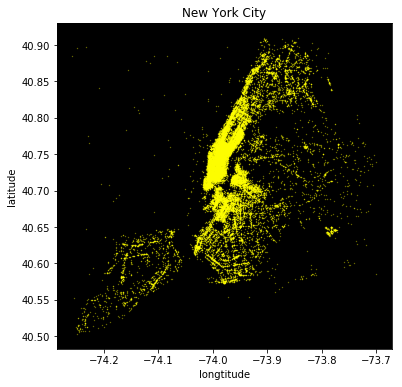

In [76]:
nyc_venues = tip.loc[tip.city_v == 'New York'][['vid','latitude','longtitude']].drop_duplicates()
f, ax = plt.subplots(1, 1, sharey=True,figsize=(6,6))

lon_min, lon_max = -74.26,-73.70
lat_min, lat_max = 40.49,40.91
nyc_venues = nyc_venues[(nyc_venues["longtitude"]>lon_min) &\
                    (nyc_venues["longtitude"]<lon_max) &\
                    (nyc_venues["latitude"]>lat_min) &\
                    (nyc_venues["latitude"]<lat_max)]
nyc_venues.plot(kind='scatter', x='longtitude', y='latitude',
                color='yellow', 
                s=.09, alpha=.6, subplots=True, ax=ax)
ax.set_title("New York City")
ax.set_facecolor('black')

plt.show()

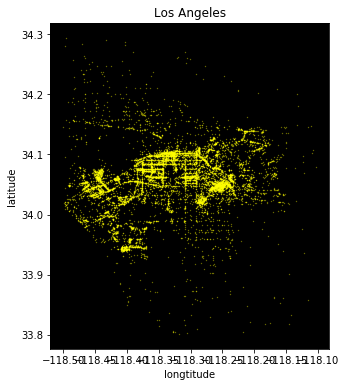

In [78]:
LA_venues = tip.loc[tip.city_v == 'Los Angeles'][['vid','latitude','longtitude']].drop_duplicates()
f, ax = plt.subplots(1, 1, sharey=True,figsize=(5,6))

lon_min, lon_max = -118.5,-118.1
lat_min, lat_max = 33.8,34.3
LA_venues = LA_venues[(LA_venues["longtitude"]>lon_min) &\
                    (LA_venues["longtitude"]<lon_max) &\
                    (LA_venues["latitude"]>lat_min) &\
                    (LA_venues["latitude"]<lat_max)]

LA_venues.plot(kind='scatter', x='longtitude', y='latitude',
                color='yellow', 
                s=.09, alpha=.6, subplots=True, ax=ax)
ax.set_title('Los Angeles')
ax.set_facecolor('black')

plt.show()